In [8]:
import sys

# Complete with appropriate path
sys.path.append("../../")

# Complete with appropriate object to import
from pyACC.calculus import integrate 
from pyACC.cosmology import distances
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
#set costants
c = 299792 #c in  km/s
H_0 = 100 #h km /s/Mpc
D_h = c/H_0 #hubble distance in Mpc/h

In [10]:
#data = pd.read_csv('Pantheon/DataRelease/Pantheon+_Data/4_DISTANCES_AND_COVAR/Pantheon+SH0ES.dat', sep='\\s+', header=None, names=['zHD', 'zHDERR', 'MU_SH0ES' , 'MU_SH0ES_ERR_DIAG'], dtype={'zHD': np.float64, 'zHDERR': np.float64, 'MU_SH0ES': np.float64, 'MU_SH0ES_ERR_DIAG': np.float64}, skiprows=1)
#DataFrame to numpy array
data= pd.DataFrame(np.genfromtxt('Pantheon/DataRelease/Pantheon+_Data/4_DISTANCES_AND_COVAR/Pantheon+SH0ES.dat', names=True))

In [11]:
z_pantheon = data['zHD'].values
z_pantheon_err = data['zHDERR'].values
dist_modulus_pantheon = data['MU_SH0ES'].values
dist_modulus_err_pantheon = data['MU_SH0ES_ERR_DIAG'].values

In [12]:
dist_modulus = [distances.distance_modulus(z,H_0 = 67.5 ,omega_m = 0.315, omega_r=0, omega_k= 0) for z in z_pantheon]
dist_modulus_H0 = [distances.distance_modulus(z,H_0 = 69 ,omega_m = 0.315, omega_r=0, omega_k= 0) for z in z_pantheon]
dist_modulus_om = [distances.distance_modulus(z,H_0 = 67.5 ,omega_m = 0.2, omega_r=0, omega_k= 0) for z in z_pantheon]
dist_modulus_wcdm = [distances.distance_modulus(z,H_0=67,omega_m=0.319,omega_r=0,w=-1.1) for z in z_pantheon]

Text(0, 0.5, '$\\mu$ [mag]')

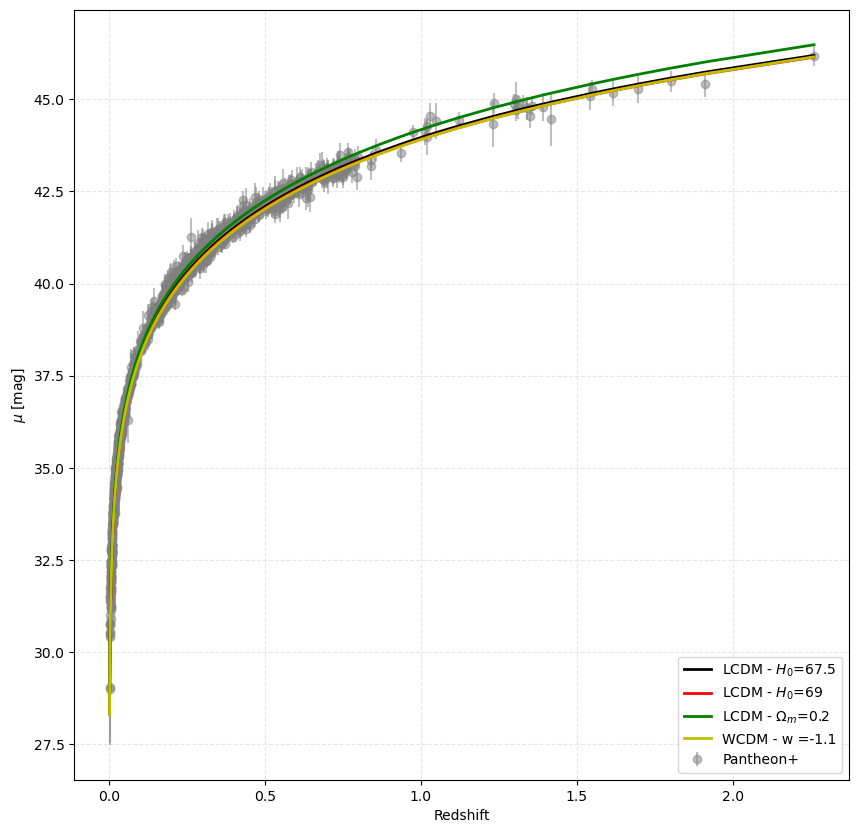

In [13]:
plt.figure(figsize=(10,10))
plt.plot(z_pantheon, dist_modulus, lw=2, color="k", label=r"LCDM - $H_0$=67.5", zorder=1000)
plt.plot(z_pantheon, dist_modulus_H0, lw=2, color="r", label=r"LCDM - $H_0$=69", zorder=1000)
plt.plot(z_pantheon, dist_modulus_om, lw=2, color="g", label=r"LCDM - $\Omega_m$=0.2", zorder=1000)
plt.plot(z_pantheon, dist_modulus_wcdm, lw=2, color="y", label=r"WCDM - w =-1.1", zorder=1000)

plt.errorbar(z_pantheon, dist_modulus_pantheon, yerr=dist_modulus_err_pantheon,fmt="o", color="0.5", alpha=0.5, label="Pantheon+")
plt.grid(True, color="0.9", ls="--")
plt.legend(loc="lower right")
plt.xlabel("Redshift")
plt.ylabel("$\mu$ [mag]")